In [2]:
import pandas as pd #Importing Pandas Library for reading Dataset and processing
import numpy as np  #Importing Numpy for numerical data processing
import matplotlib.pyplot as plt # Importing Pyplot for plots and visualization
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
dataset = pd.read_csv('Dataset/Dataset.csv') # loading the data

**Analyzing the Data**

In [4]:
#Check the Data and its values
dataset.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50


In [5]:
#Checking the shape and size of data
dataset.shape

(7253, 14)

In [6]:
#Checking the details of data
dataset.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
#Checking the Null Values
dataset.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [9]:
# Checking the percentage of missing values
(dataset.isnull().sum()/(len(dataset)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

**Removing the S.No column as it doesn't add any value to prediction**

In [10]:
dataset = dataset.drop(['S.No.'], axis=1)

**The New_Price column has most number of missing values so we will drop this**

In [11]:
dataset = dataset.drop(['New_Price'], axis=1)

In [12]:
dataset.shape

(7253, 12)

In [13]:
dataset = dataset.dropna(how='any')

In [14]:
dataset.shape

(5975, 12)

# **Univariate Analysis**

In [15]:
dataset.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


First we will check all the categorical and numerical columns in our data

In [16]:
categorical_cols=dataset.select_dtypes(include=['object']).columns
numerical_cols = dataset.select_dtypes(include=np.number).columns.tolist()
print("Categorical Columns:")
print(categorical_cols)
print("Numerical Columns:")
print(numerical_cols)

Categorical Columns:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')
Numerical Columns:
['Year', 'Kilometers_Driven', 'Seats', 'Price']


**Observation:** As resulted above we have 8 categorical columns and 4 numerical columns. But the Milage, Engine & Power includes both float and string values & that is why it is considered as categorical above. If we remove string part out of it, as it is of no value addition to prediction model, they falls under numerical columns. So we will remove string part out of these three columns in Univariate Analysis Section.

**NAME**

Name column has high cardinality.<br>If a column has high cardinality, it may be challenging to analyze the data in its current form. However, dropping the column altogether may lead to loss of important information. Instead, it may be useful to extract relevant information from the column, such as car model or brand, which can be used for further analysis. We can extract car model or Company from it.

In [17]:
dataset['Cars'] = dataset['Name'].str.split(" ").str[0] + ' ' +dataset['Name'].str.split(" ").str[1]
dataset.drop(columns = ['Name'],inplace = True)

In [18]:
dataset.head(5)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi A4


**Cars**

In [19]:
dataset.Cars.value_counts()

Maruti Swift         343
Honda City           265
Hyundai i20          247
Hyundai Verna        170
Toyota Innova        164
                    ... 
Volkswagen Beetle      1
Fiat Petra             1
Volkswagen Tiguan      1
Mini Clubman           1
Jaguar F               1
Name: Cars, Length: 213, dtype: int64

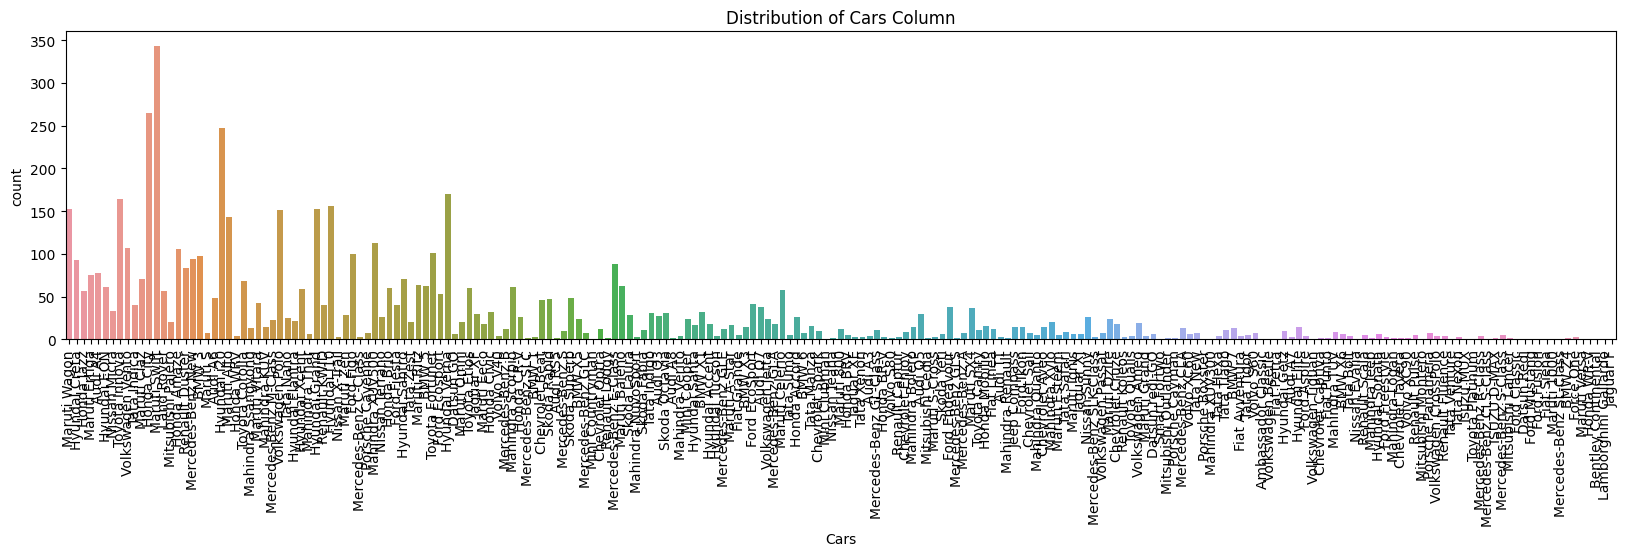

In [20]:
plt.figure(figsize=(20,4))
sns.countplot(dataset,x='Cars',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Cars Column');

**Observation:** There are some cars which have very low frequency in the dataset, si its better to drop them for better model results

In [21]:
dataset.shape

(5975, 12)

In [22]:
threshold = 10
counts = dataset.Cars.value_counts()
to_drop = counts[counts<threshold].index.tolist()
dataset = dataset[~dataset['Cars'].isin(to_drop)]

In [23]:
dataset.shape

(5602, 12)

In [24]:
dataset.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

**Location**

In [25]:
#Checking the unique values in Location
print("Unique Values of Location:\n ",dataset['Location'].unique())
print("Total number of Locations: ",len(dataset['Location'].unique()))

Unique Values of Location:
  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Total number of Locations:  11


Text(0.5, 1.0, 'Distribution of Location Column')

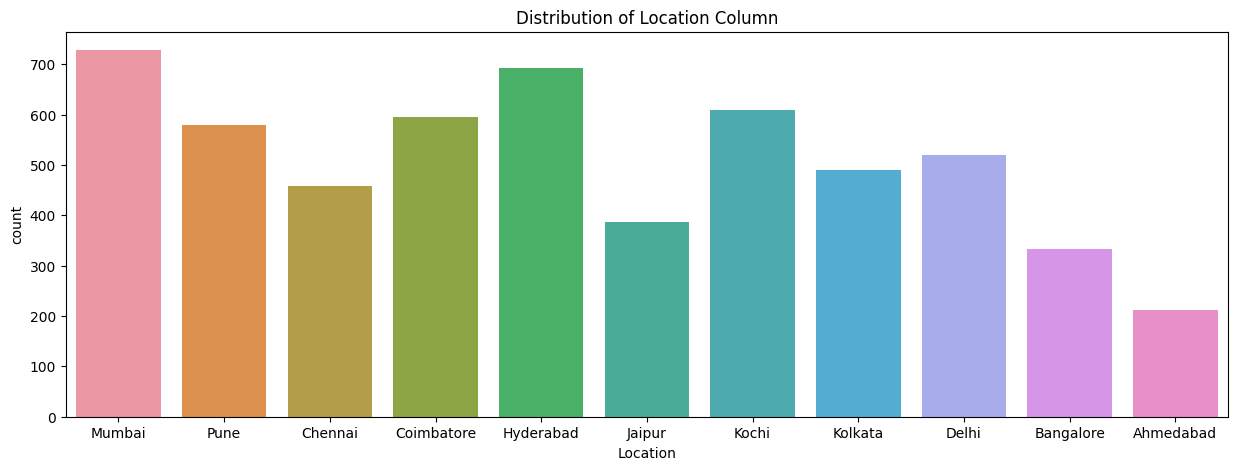

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(dataset,x='Location');
plt.title('Distribution of Location Column')

**Plot Distribution Chart of Location to check its dependency**

In [27]:
def pie_chart_config(chart_name, len_values='', color_map=''):
  pc_config = dict(
      fontsize   = 6,
      figsize    = (60,5),
      autopct    = '%1.1f%%'
    )
  pc_config['title'] = chart_name
  if color_map:
    pc_config['colormap'] = color_map
  if len_values:
    pc_config['explode'] = [0.1]*len_values

  return pc_config

<Axes: title={'center': 'Category Distribution - Store'}, ylabel='Location'>

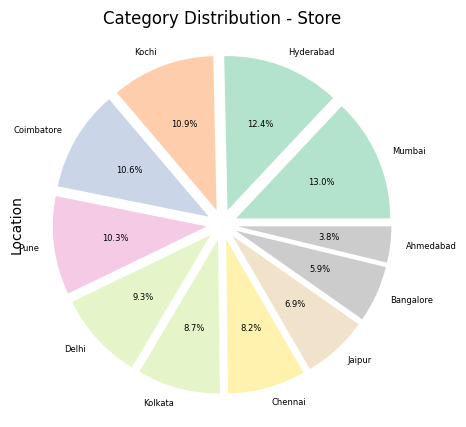

In [28]:
category_config = pie_chart_config('Category Distribution - Store', color_map='Pastel2', len_values=11) # category has 17 unique values and we would like to plot all.
dataset['Location'].value_counts().plot.pie(**category_config)

**Observation:** We can see that there is not any significant difference in distribution of data based on Location. So we consider all locations & will convert this categorical data into numerical in Data Engineering Section

**Fuel_Type**

In [29]:
#Checking the Unique Values in Fuel_Type
print("Unique Values of Fuel Type:\n ",dataset['Fuel_Type'].unique())
print("Total number of Fuel Type: ",len(dataset['Fuel_Type'].unique()))

Unique Values of Fuel Type:
  ['CNG' 'Diesel' 'Petrol' 'LPG']
Total number of Fuel Type:  4


**Plot Distribution Chart of Fuel_Type to check its dependency**

Text(0.5, 1.0, 'Distribution of Fuel Type Column')

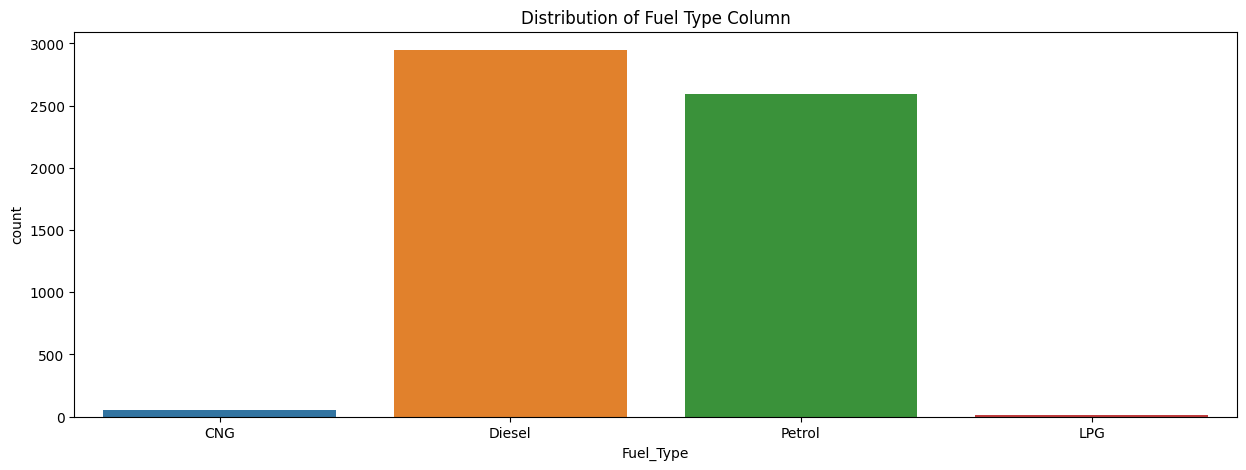

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(dataset,x='Fuel_Type');
plt.title('Distribution of Fuel Type Column')

<Axes: title={'center': 'Category Distribution - Store'}, ylabel='Fuel_Type'>

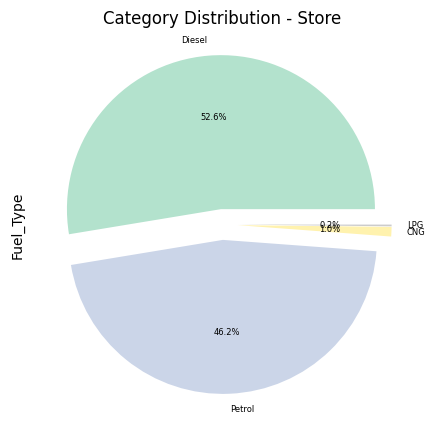

In [31]:
category_config = pie_chart_config('Category Distribution - Store', color_map='Pastel2', len_values=4) # category has 17 unique values and we would like to plot all.
dataset['Fuel_Type'].value_counts().plot.pie(**category_config)

**Observation:** It is clearly depictable that Petrol and Diesel has 98.9% occupancy in the dataset. On the other hand, there is only 1.1% of CNG, LPG as combine. We will conisder Petrol & Diesel categories to model. We will convert categorical into number values at Data Enginnering section

**Transmission**

In [32]:
#Checking the Unique Values in Transmission
print("Unique Values of Transmission:\n ",dataset['Transmission'].unique())
print("Total number of Transmission: ",len(dataset['Transmission'].unique()))

Unique Values of Transmission:
  ['Manual' 'Automatic']
Total number of Transmission:  2


Text(0.5, 1.0, 'Distribution of Transmission Column')

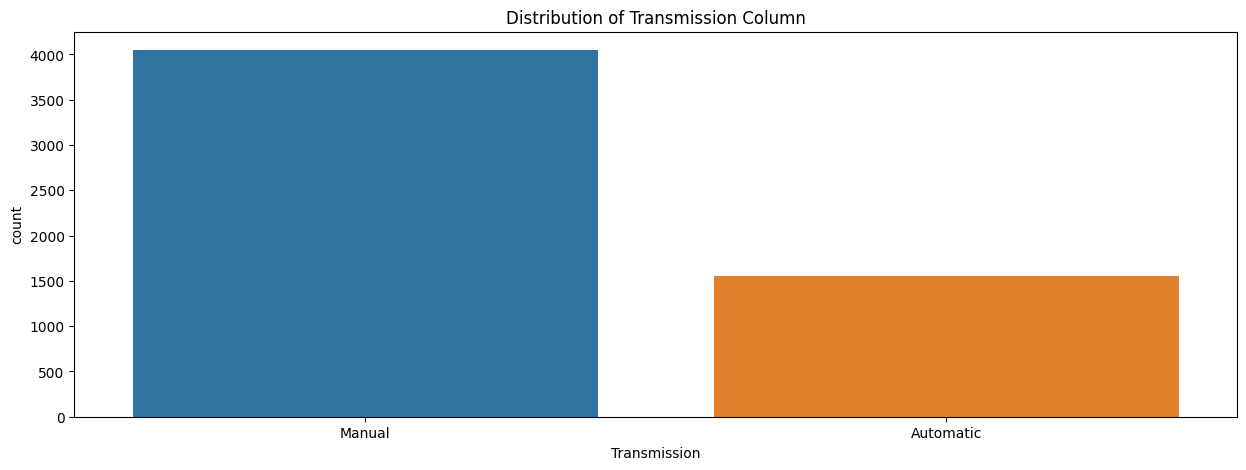

In [33]:
plt.figure(figsize=(15,5))
sns.countplot(dataset,x='Transmission');
plt.title('Distribution of Transmission Column')

<Axes: title={'center': 'Category Distribution - Store'}, ylabel='Transmission'>

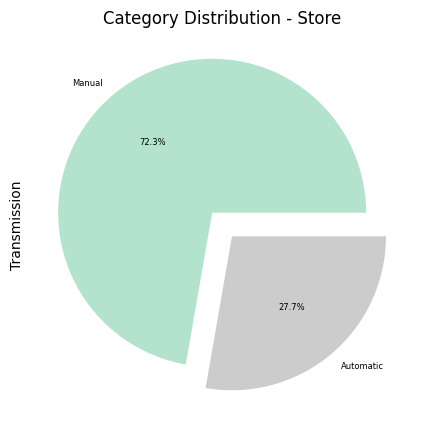

In [34]:
category_config = pie_chart_config('Category Distribution - Store', color_map='Pastel2', len_values=2) # category has 17 unique values and we would like to plot all.
dataset['Transmission'].value_counts().plot.pie(**category_config)

**Observation:** It is clearly depictable that both categories have major contribution in dataset. We will convert categorical into numerical in Data Engineering Section

**OWNER TYPE**

In [35]:
#Checking the Unique Values in Owner_Type
print("Unique Values of Owner Type:\n ",dataset['Owner_Type'].unique())
print("Total number of Owner Type: ",len(dataset['Owner_Type'].unique()))

Unique Values of Owner Type:
  ['First' 'Second' 'Fourth & Above' 'Third']
Total number of Owner Type:  4


**Plot Distribution Chart of Owner_Type to check its dependency**

Text(0.5, 1.0, 'Distribution of Owner Type Column')

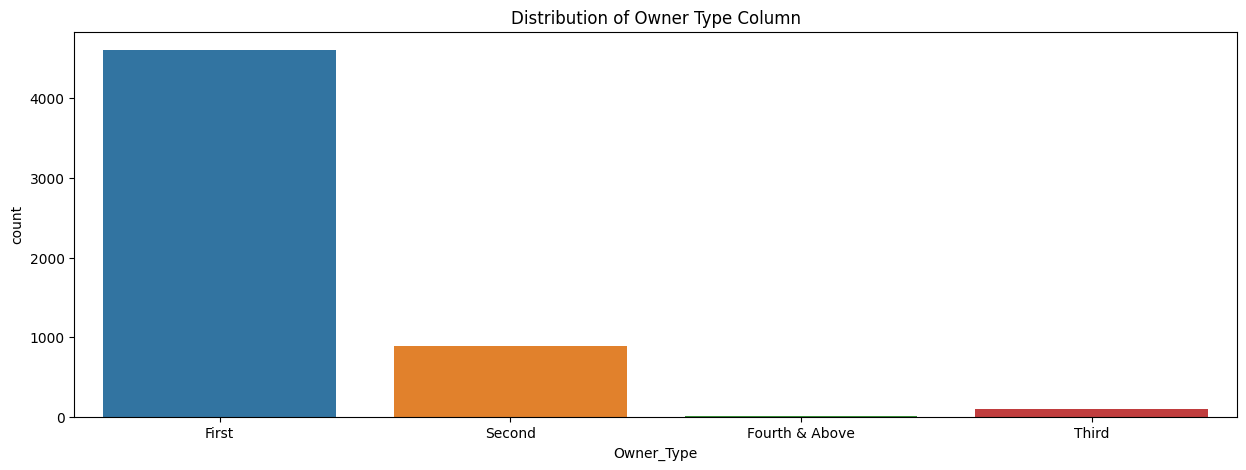

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(dataset,x='Owner_Type');
plt.title('Distribution of Owner Type Column')

<Axes: title={'center': 'Category Distribution - Store'}, ylabel='Owner_Type'>

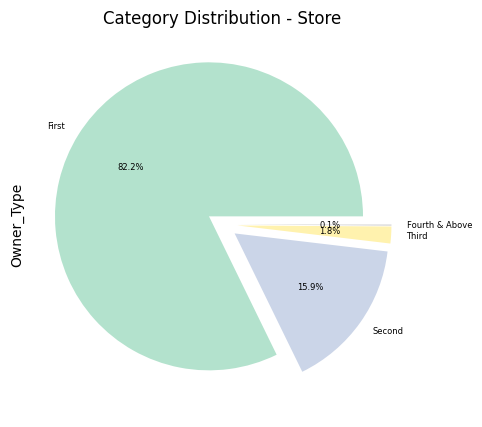

In [37]:
category_config = pie_chart_config('Category Distribution - Store', color_map='Pastel2', len_values=4) # category has 17 unique values and we would like to plot all.
dataset['Owner_Type'].value_counts().plot.pie(**category_config)

**Observation:** It is clearly depictable that First and Second has 98% occupancy in the dataset. On the other hand, there is only 2% of Third & Fourth and Above as combine. Despite  the last two categories have very low occupany compared to rest two major catgories, we will consider it in the  model. We will convert categorical into numerical in Data Engineering Section

**Seats**

In [38]:
#Checking the Unique Values in Seats
print("Unique Values of Seats:\n ",dataset['Seats'].unique())
print("Total number of Seats: ",len(dataset['Seats'].unique()))

Unique Values of Seats:
  [5. 7. 8. 4. 6. 9. 0.]
Total number of Seats:  7


Text(0.5, 1.0, 'Distribution of Seats Column')

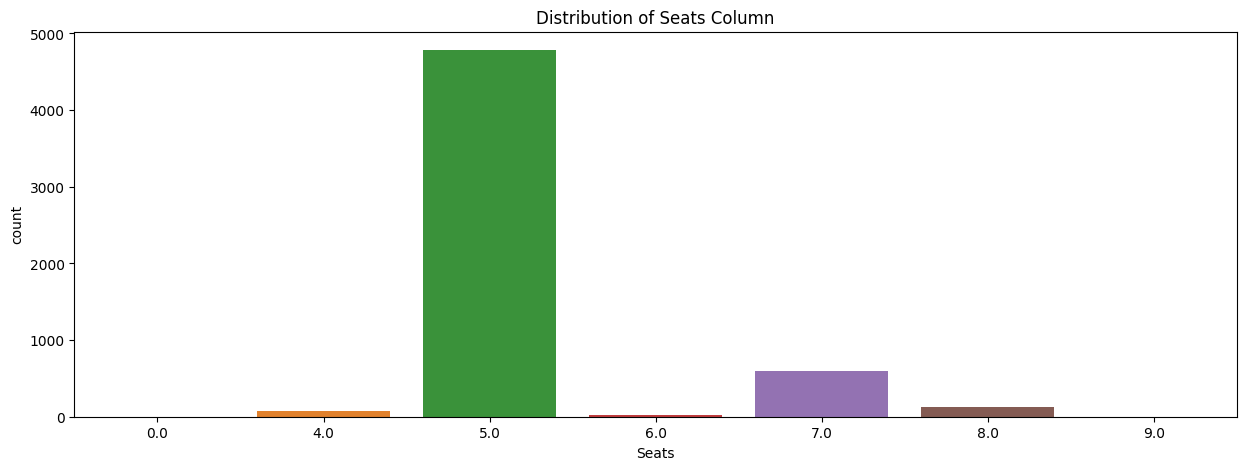

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(dataset,x='Seats');
plt.title('Distribution of Seats Column')

<Axes: title={'center': 'Category Distribution - Store'}, ylabel='Seats'>

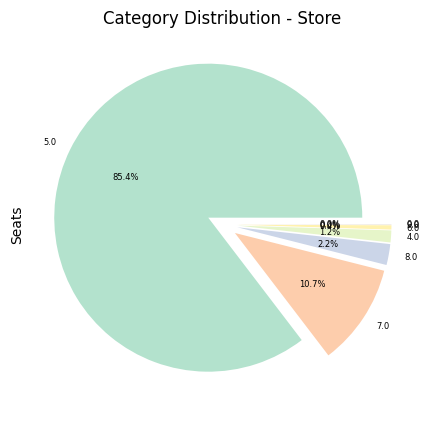

In [40]:
category_config = pie_chart_config('Category Distribution - Store', color_map='Pastel2', len_values=7) # category has 8 unique values and we would like to plot all.
dataset['Seats'].value_counts().plot.pie(**category_config)

**Observation:** It is clearly depictable that 5.0 has 88.3% occupancy in the dataset. On the other hand, there is only 8.8% & 2.2% for 7.0 & 8.0. Despite 7.0 & 8.0 has 10.2% occupancy  combined that is very low compared to major catgory,it may be advisable to exclude Seats with low frequency from the dataset.

In [41]:
dataset['Seats'].value_counts()

5.0    4783
7.0     598
8.0     123
4.0      70
6.0      25
9.0       2
0.0       1
Name: Seats, dtype: int64

In [42]:
dataset = dataset[dataset.Seats.between(4,9)]

**Mileage, Engine & Power**

In [43]:
dataset['Mileage'] = dataset['Mileage'].str.replace(' kmpl','')
dataset['Mileage'] = dataset['Mileage'].str.replace(' km/kg','')
dataset['Engine'] = dataset['Engine'].str.replace(' CC','')
dataset['Power'] = dataset['Power'].str.replace('null bhp','112')
dataset['Power'] = dataset['Power'].str.replace(' bhp','')

dataset['Mileage'] = dataset['Mileage'].astype(float)
dataset['Engine'] = dataset['Engine'].astype(float)
dataset['Power'] = dataset['Power'].astype(float)

Engine, Power, Kilometers Driven, Mileage and Price have outliers based on data we have seen initially

Removing Outliers

In [44]:
dataset.shape

(5601, 12)

In [45]:
for col in ['Kilometers_Driven']:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2.5*IQR
    upper_bound = Q3 + 2.5*IQR
    dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

In [46]:
dataset.shape

(5534, 12)

In [47]:
def hist_box_plot(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    ax[0].ticklabel_format(style='plain')
    ax[1].ticklabel_format(style='plain')
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

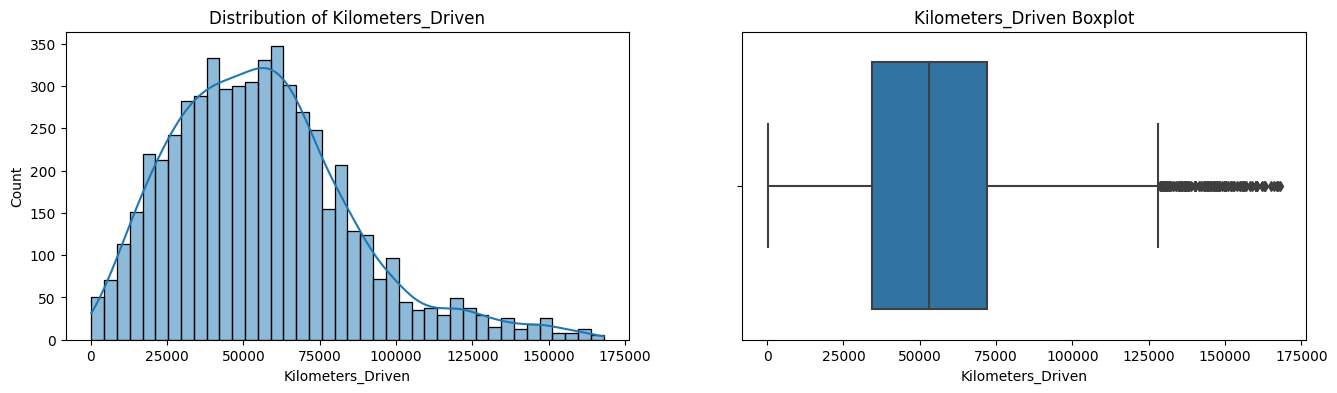

In [48]:
hist_box_plot(dataset,'Kilometers_Driven')

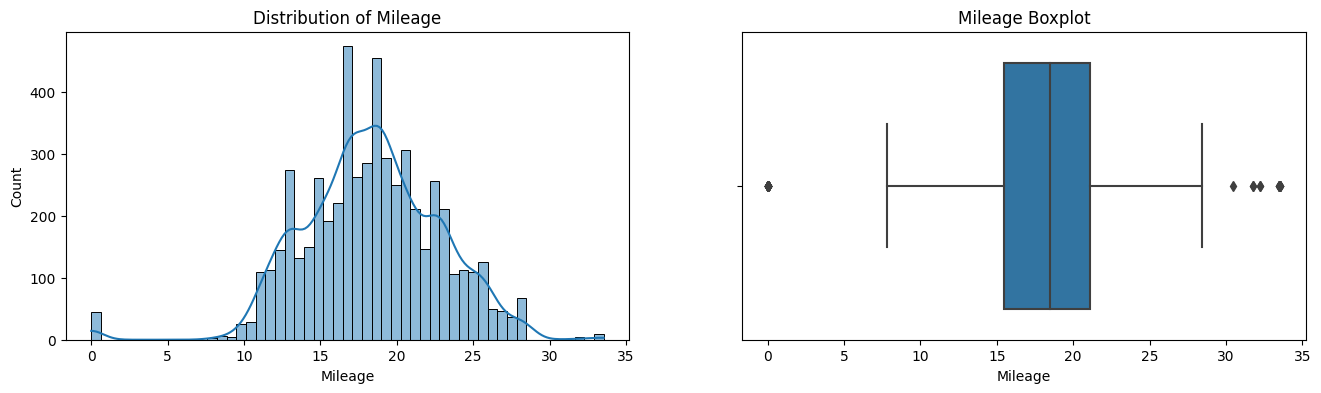

In [49]:
hist_box_plot(dataset,'Mileage')

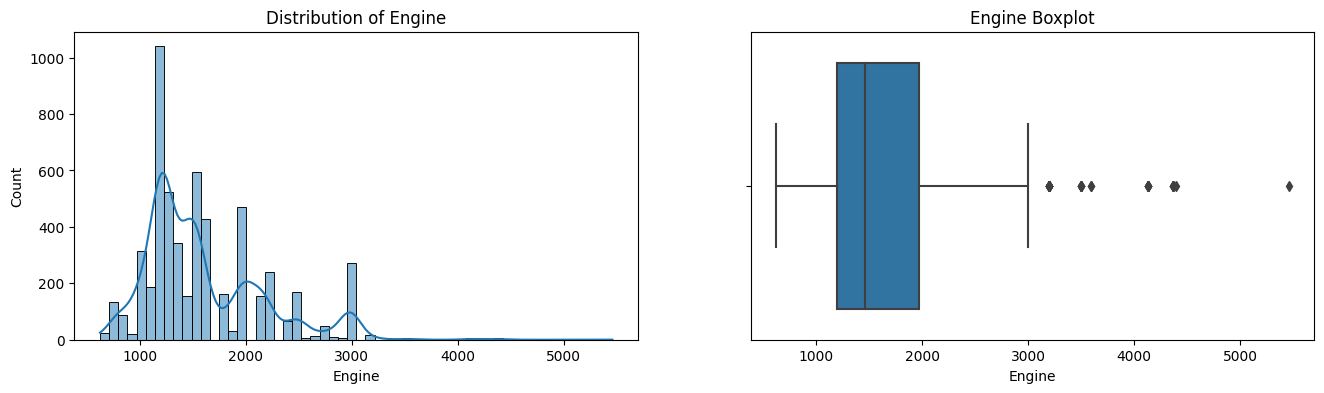

In [50]:
hist_box_plot(dataset,'Engine')

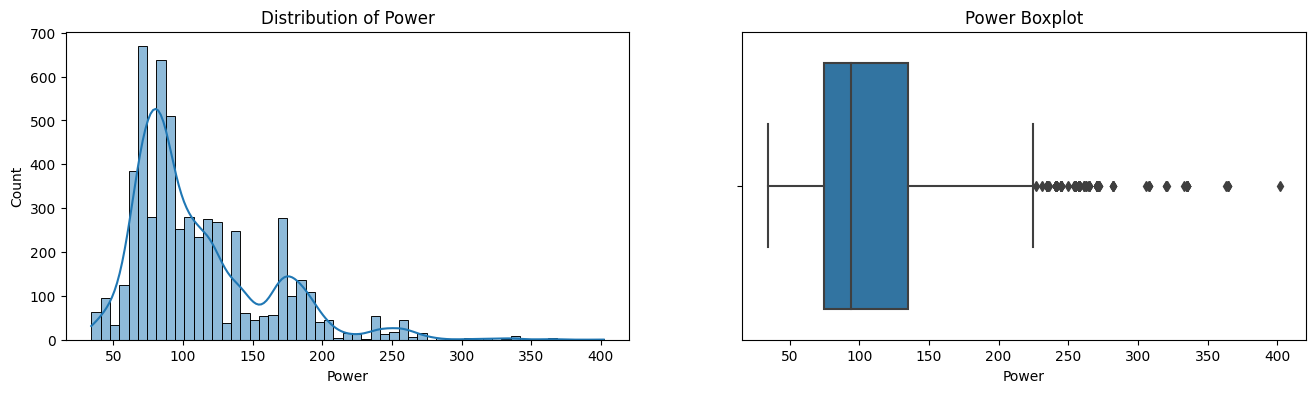

In [51]:
hist_box_plot(dataset,'Power')

# **BiVariate Analysis**

In [52]:
import plotly.express as px
aggregate_plot = dataset.groupby('Year')['Price'].mean().sort_values(ascending=False)
fig = px.bar(aggregate_plot , color = aggregate_plot.index , width=700 , height =500,title='Year vs Mean Price')
fig.show()

In [53]:
aggregate_plot = dataset.groupby('Location')['Price'].mean().sort_values(ascending=False)
fig = px.bar(aggregate_plot , color = aggregate_plot.index , width=700 , height =500,title='Location vs Price')
fig.show()

In [54]:
aggregate_plot = dataset.groupby('Cars')['Price'].mean().sort_values(ascending=False)
fig = px.bar(aggregate_plot, color = aggregate_plot.index, title='Cars vs Mean Price', width=900 , height =700)
fig.show()

In [55]:
aggregate_plot = dataset.groupby('Fuel_Type')['Price'].mean().sort_values(ascending = False)
fig = px.bar(aggregate_plot, color = aggregate_plot.index, title='Fuel Type vs Mean Price', width=900 , height =700)
fig.show()

In [56]:
aggregate_plot = dataset.groupby('Transmission')['Price'].sum().sort_values(ascending=False)
fig = px.bar(aggregate_plot, color = aggregate_plot.index, title='Transmission vs Mean Price', width=900, height =700)
fig.show()

In [57]:
aggregate_plot = dataset.groupby('Owner_Type')['Price'].sum().sort_values(ascending=False)
fig = px.bar(aggregate_plot, color = aggregate_plot.index, title='Owner Type vs Mean Price', width=900, height =700)
fig.show()

In [58]:
aggregate_plot = dataset.groupby('Seats')['Price'].sum().sort_values(ascending=False)
fig = px.bar(aggregate_plot, color = aggregate_plot.index, title='Seats vs Mean Price', width=900, height =700)
fig.show()

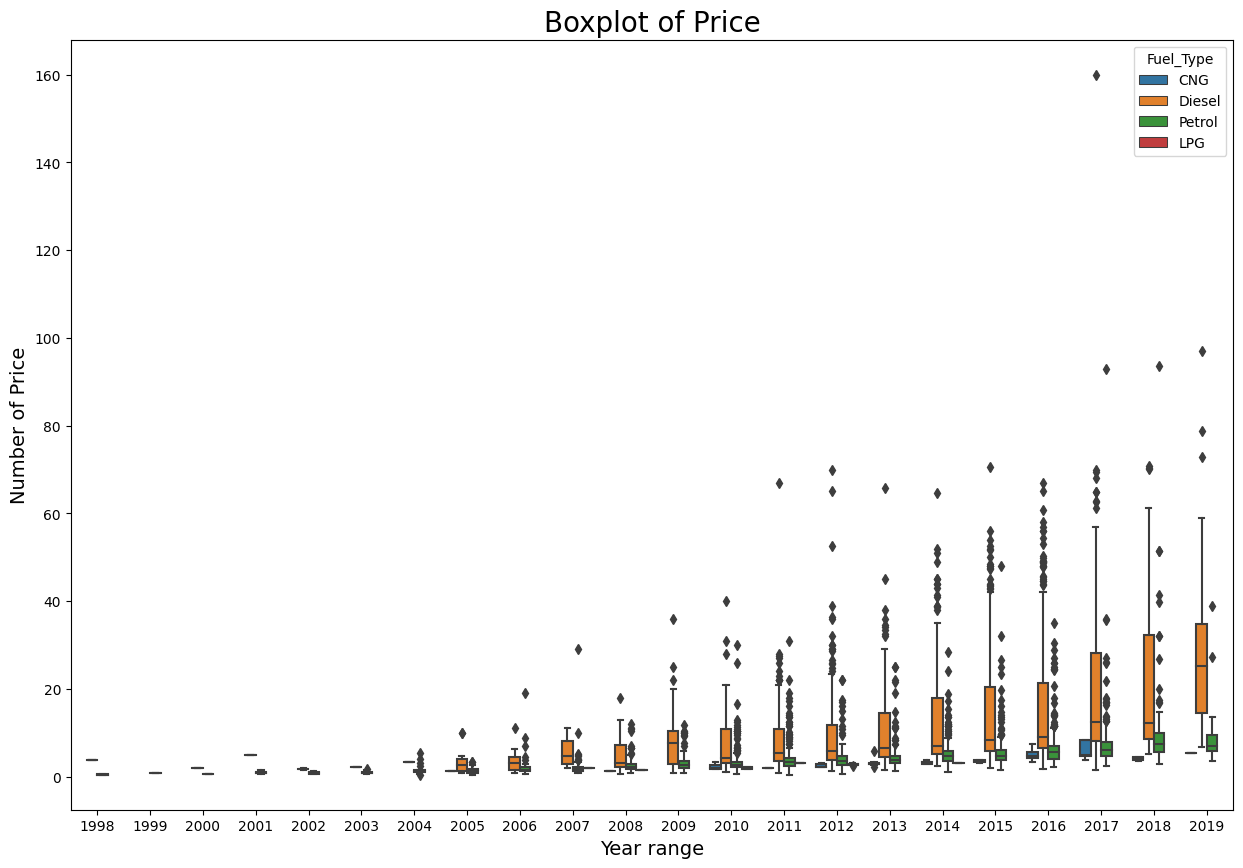

In [59]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=dataset, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

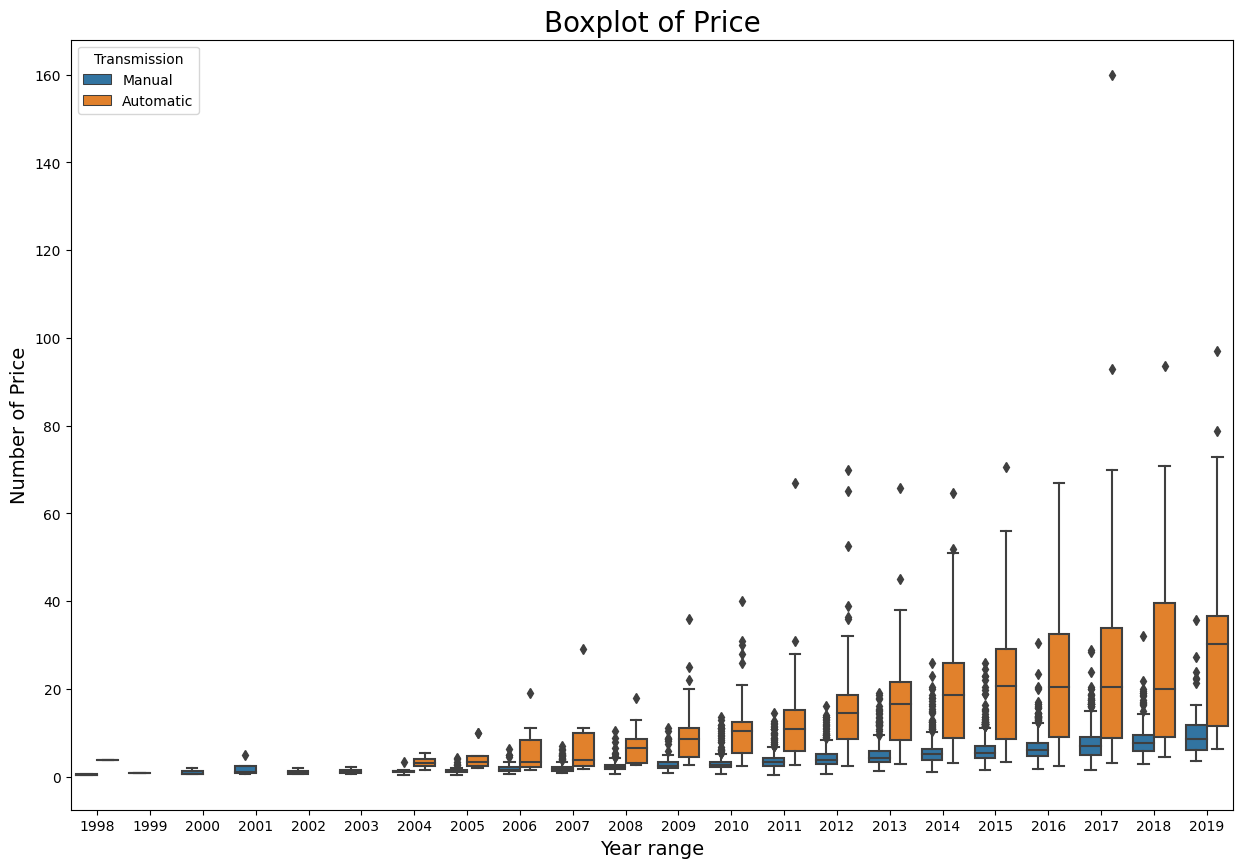

In [60]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=dataset, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [61]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(dataset, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

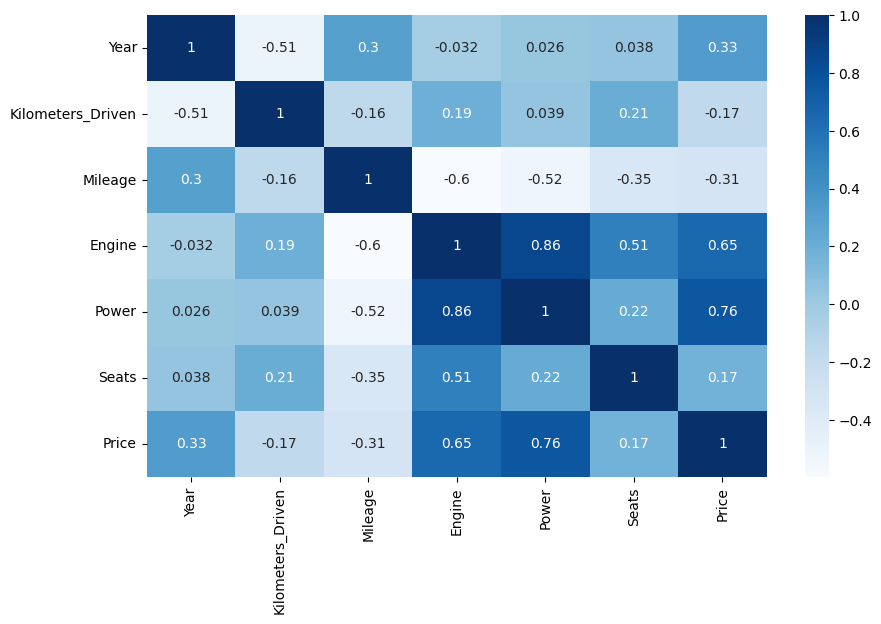

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True,cmap='Blues');

# **DATA PREPARATION**

In [63]:


# Encode labels in column 'species'.
Location_dum = pd.get_dummies(dataset["Location"])
dataset =pd.concat([dataset,Location_dum],axis=1)
dataset.drop("Location",axis=1,inplace=True)

Fuel_Type_dum = pd.get_dummies(dataset["Fuel_Type"])
dataset =pd.concat([dataset,Fuel_Type_dum],axis=1)
dataset.drop("Fuel_Type",axis=1,inplace=True)

Transmission_dum = pd.get_dummies(dataset["Transmission"])
dataset =pd.concat([dataset,Transmission_dum],axis=1)
dataset.drop("Transmission",axis=1,inplace=True)

Owner_Type_dum = pd.get_dummies(dataset["Owner_Type"])
dataset =pd.concat([dataset,Owner_Type_dum],axis=1)
dataset.drop("Owner_Type",axis=1,inplace=True)

Cars_dum = pd.get_dummies(dataset["Cars"])
dataset =pd.concat([dataset,Cars_dum],axis=1)
dataset.drop("Cars",axis=1,inplace=True)

## **MODEL**

In [64]:
!pip install catboost
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

In [65]:
def Models(models):

    model = models
    X = dataset.drop(columns=['Price']).values
    y = dataset['Price'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10))
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

In [66]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [67]:
X = dataset.drop(columns=['Price']).values
y = dataset['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)

    Acc = Acc.append(pd.Series({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

**We will go with multiple regressors on our dataset and check which one is providing the best accuracy.**

In [68]:
Acc.sort_values(by='Accuracy on Testing set')

,model,Root Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
3,MLPRegressor,6.891216,0.546793,0.532018
4,AdaBoostRegressor,5.649055,0.696287,0.685523
0,DecisionTreeRegressor,3.479359,0.999996,0.880701
2,RandomForestRegressor,2.434048,0.987633,0.941616
1,XGBRegressor,2.200991,0.994145,0.952261
5,ExtraTreesRegressor,2.162838,0.999996,0.953902


**Observation:** The results are bit equal i.e. 3 algorithms have given ove 90% accuracy on tesing set and 3 have given below 90%. <br>
Lets make prdictions on the best one and try couple more in order to improve accuracy

## **Random Forest Regressor**

		Error Table
Mean Absolute Error      :  1.3004386441900584
Mean Squared  Error      :  7.114408104022361
Root Mean Squared  Error :  2.6672847812002303
Accuracy on Traing set   :  0.984391389326259
Accuracy on Testing set  :  0.9307230637196574


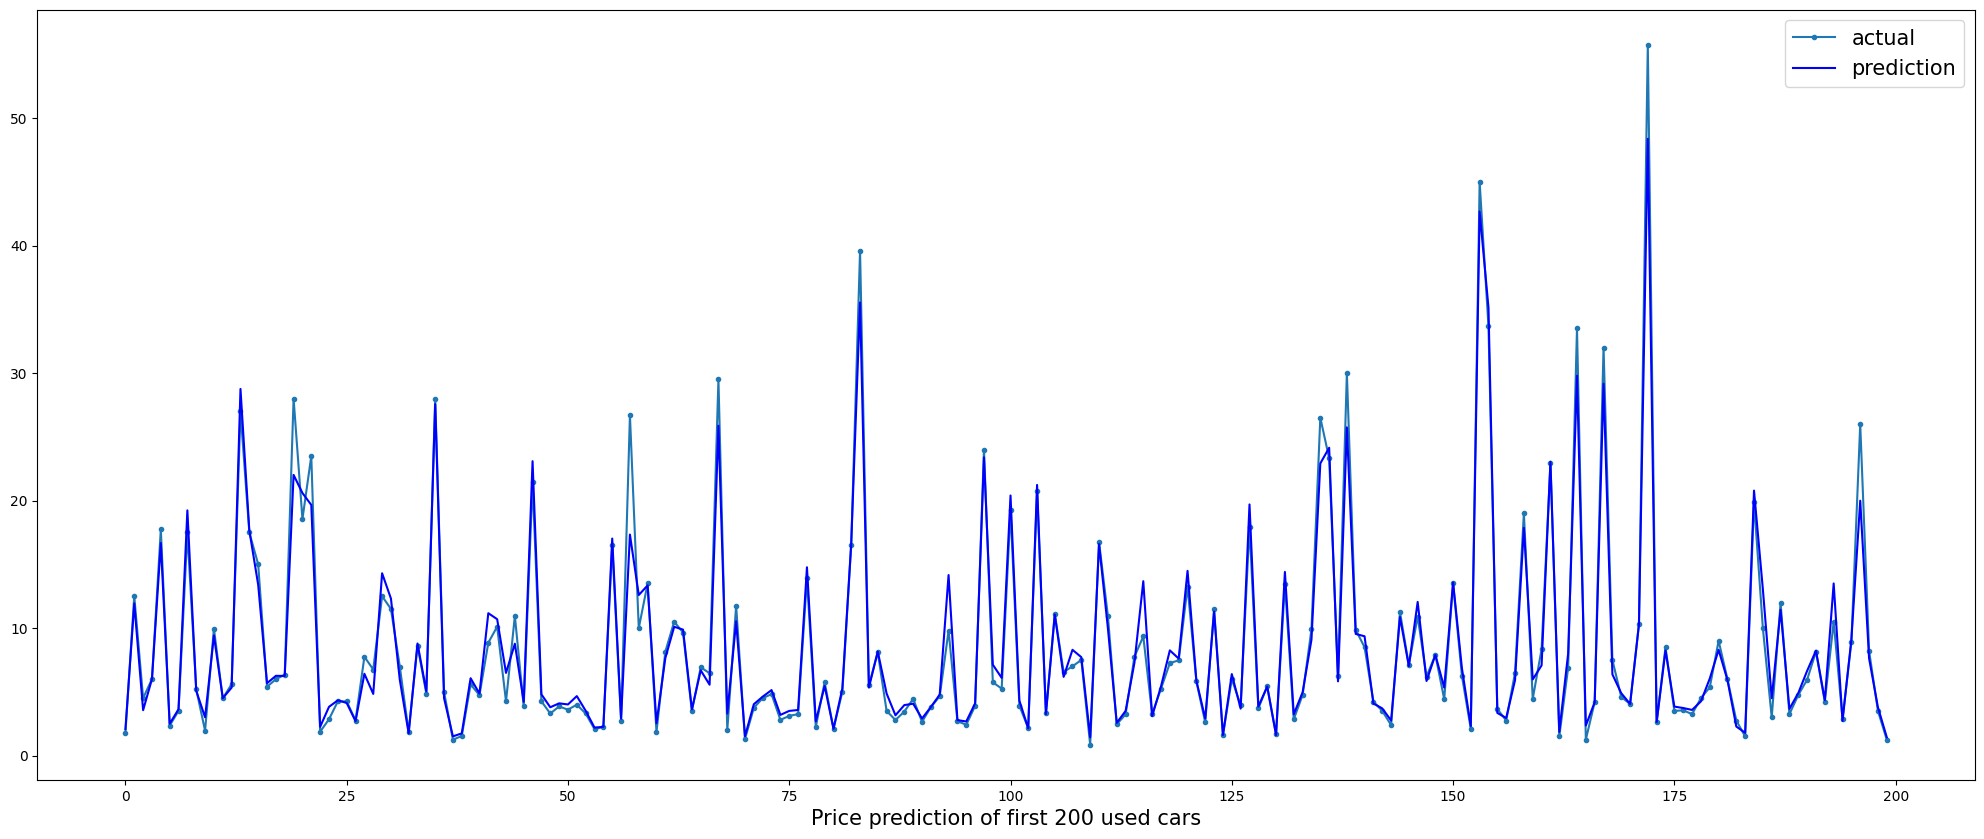

In [69]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(200, y_actual, y_predicted)

In [70]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

,Prediction,Test Data,Abs error,AAD%
0,2.074227,1.75,0.324227,18.527284
1,11.933706,12.50,0.566294,4.530352
2,3.558751,4.50,0.941249,20.916641
3,6.005743,6.00,0.005743,0.095718
4,16.669238,17.74,1.070762,6.035861
5,2.497641,2.35,0.147641,6.282582
6,3.632033,3.50,0.132033,3.772367
7,19.232981,17.50,1.732981,9.902751
8,5.080057,5.20,0.119943,2.306599
9,3.003196,1.95,1.053196,54.010043


# **Extra Tree Regressor**

		Error Table
Mean Absolute Error      :  1.1508843933588753
Mean Squared  Error      :  5.122614485439294
Root Mean Squared  Error :  2.2633193511829686
Accuracy on Traing set   :  0.9999952634571762
Accuracy on Testing set  :  0.9501182625303859


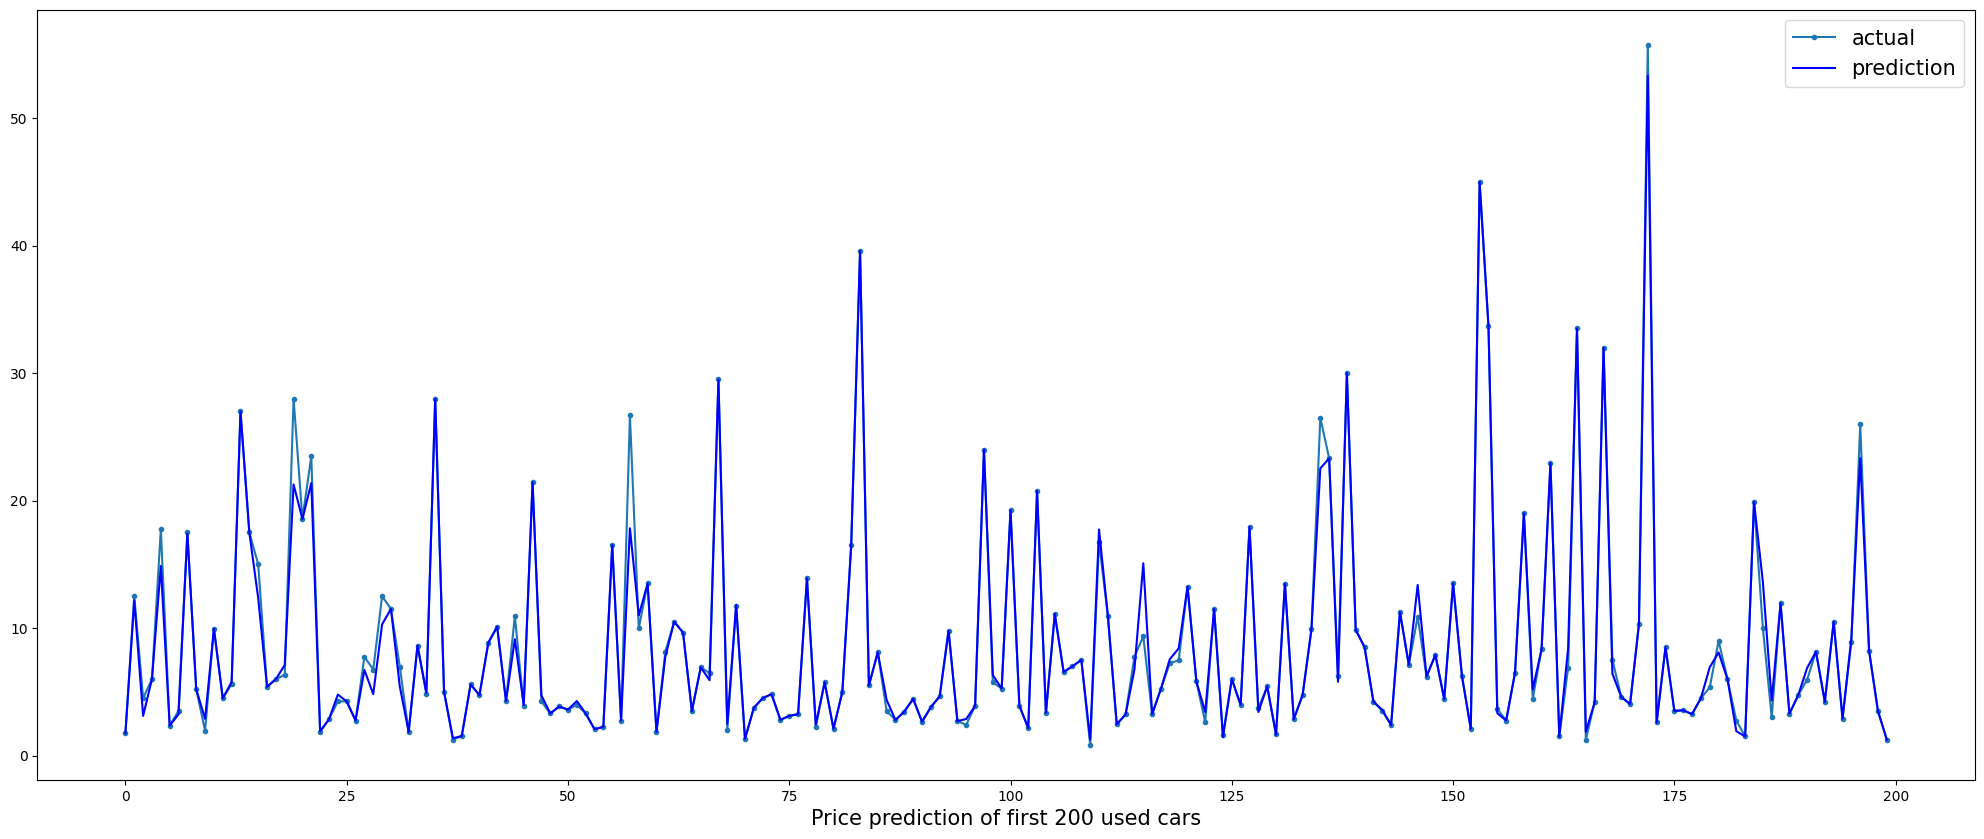

In [71]:
y_predicted, y_actual = Models(ExtraTreesRegressor(random_state=25, n_estimators=3000))
Graph_prediction(200, y_actual, y_predicted)

In [72]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

,Prediction,Test Data,Abs error,AAD%
0,1.750000,1.75,0.000000e+00,0.000000e+00
1,12.161403,12.50,3.385967e-01,2.708773e+00
2,3.110690,4.50,1.389310e+00,3.087356e+01
3,6.000000,6.00,0.000000e+00,0.000000e+00
4,14.872703,17.74,2.867297e+00,1.616289e+01
5,2.350000,2.35,1.150191e-13,4.894430e-12
6,3.233667,3.50,2.663333e-01,7.609524e+00
7,17.419840,17.50,8.016000e-02,4.580571e-01
8,5.200000,5.20,2.779998e-13,5.346151e-12
9,2.875777,1.95,9.257767e-01,4.747573e+01


## **Gradient Boosting Regressor**

		Error Table
Mean Absolute Error      :  1.1010119887800276
Mean Squared  Error      :  4.506633955999949
Root Mean Squared  Error :  2.1228834061247803
Accuracy on Traing set   :  0.9998136710213047
Accuracy on Testing set  :  0.956116406474894


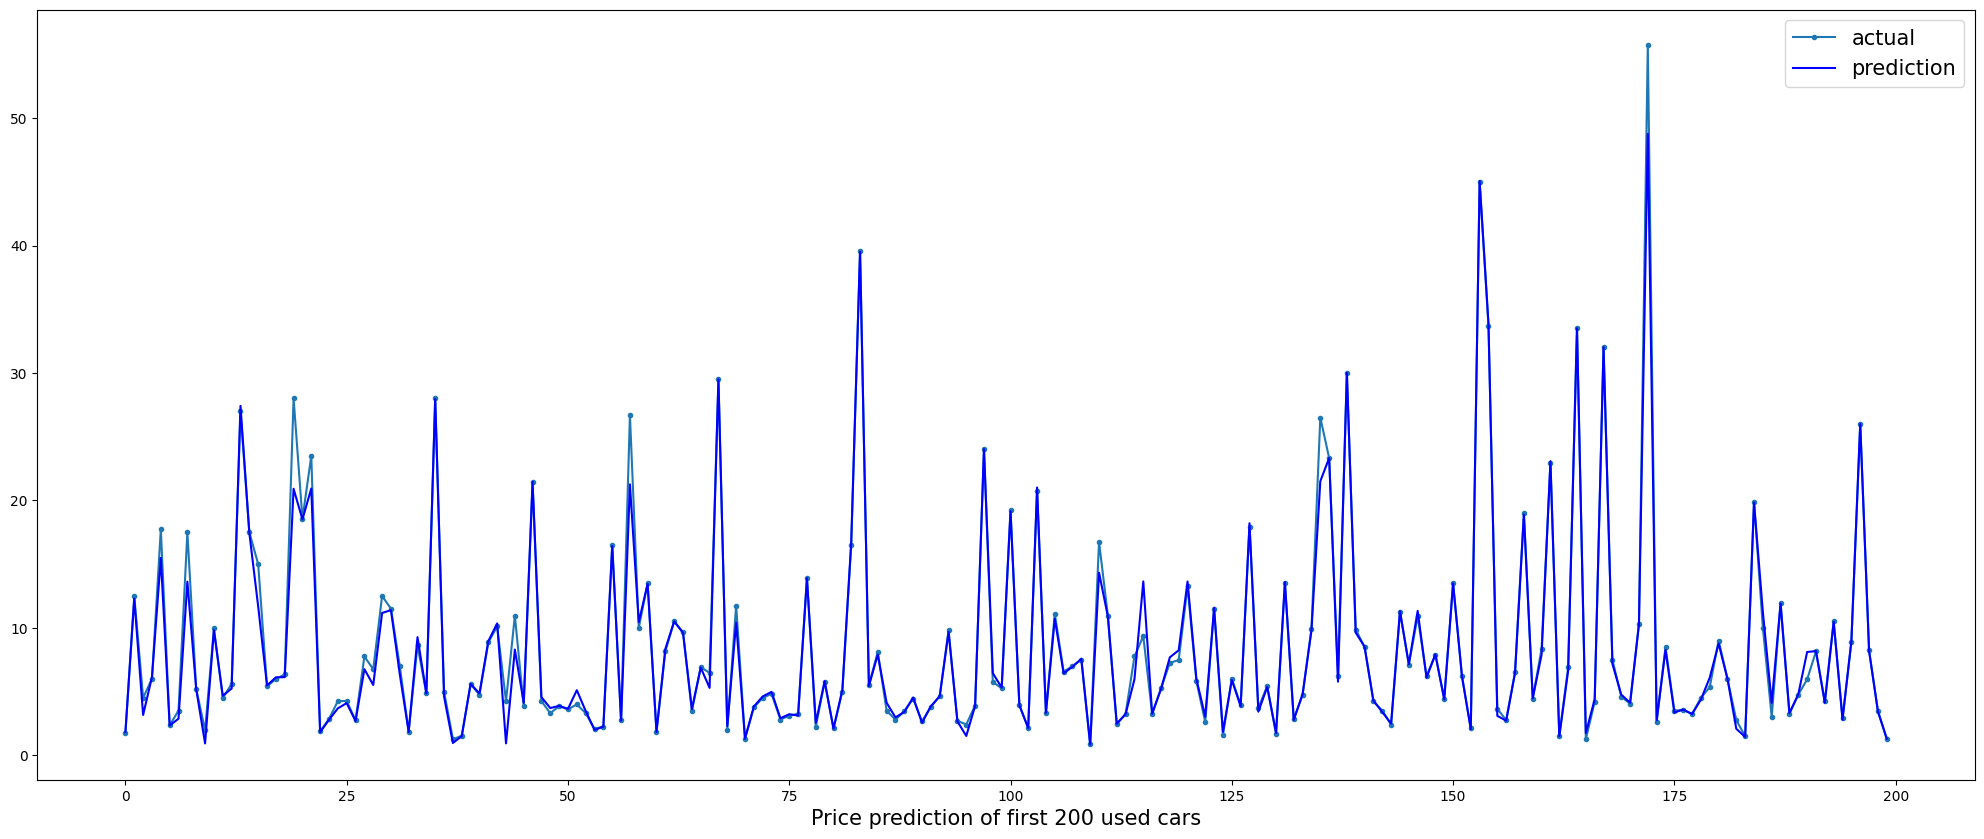

In [73]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=25, n_estimators=10000))
Graph_prediction(200, y_actual, y_predicted)

In [74]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

,Prediction,Test Data,Abs error,AAD%
0,1.817468,1.75,0.067468,3.855332
1,12.289066,12.50,0.210934,1.687471
2,3.162185,4.50,1.337815,29.729230
3,6.138193,6.00,0.138193,2.303212
4,15.486508,17.74,2.253492,12.702886
5,2.331741,2.35,0.018259,0.776979
6,2.867620,3.50,0.632380,18.068000
7,13.624325,17.50,3.875675,22.146714
8,5.171910,5.20,0.028090,0.540199
9,0.924495,1.95,1.025505,52.590018


## **Cat Boost Regressor**

Streaming output truncated to the last 5000 lines.
5006:	learn: 0.7387470	total: 14.5s	remaining: 14.5s
5007:	learn: 0.7387147	total: 14.5s	remaining: 14.5s
5008:	learn: 0.7386581	total: 14.5s	remaining: 14.5s
5009:	learn: 0.7385527	total: 14.5s	remaining: 14.5s
5010:	learn: 0.7384429	total: 14.5s	remaining: 14.5s
5011:	learn: 0.7383123	total: 14.5s	remaining: 14.5s
5012:	learn: 0.7382198	total: 14.6s	remaining: 14.5s
5013:	learn: 0.7381251	total: 14.6s	remaining: 14.5s
5014:	learn: 0.7380897	total: 14.6s	remaining: 14.5s
5015:	learn: 0.7379578	total: 14.6s	remaining: 14.5s
5016:	learn: 0.7378285	total: 14.6s	remaining: 14.5s
5017:	learn: 0.7377514	total: 14.6s	remaining: 14.5s
5018:	learn: 0.7377156	total: 14.6s	remaining: 14.5s
5019:	learn: 0.7376425	total: 14.6s	remaining: 14.5s
5020:	learn: 0.7376003	total: 14.6s	remaining: 14.5s
5021:	learn: 0.7375079	total: 14.6s	remaining: 14.4s
5022:	learn: 0.7374526	total: 14.6s	remaining: 14.4s
5023:	learn: 0.7373874	total: 14.6s	remaining: 1

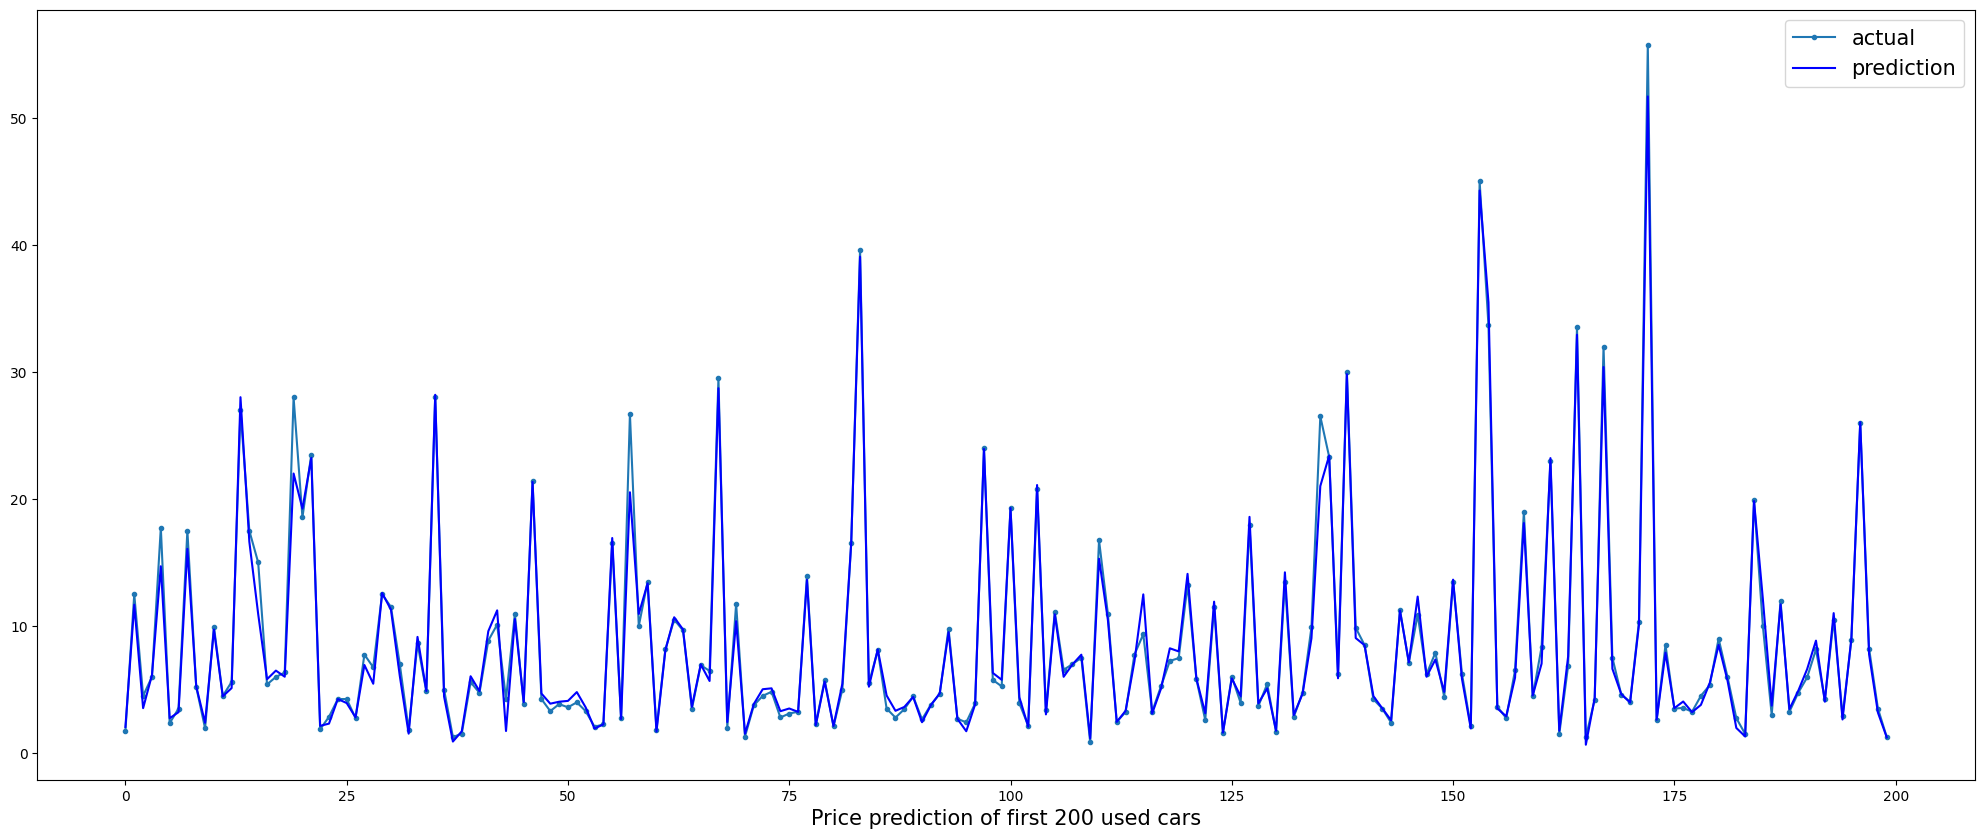

In [75]:
y_predicted, y_actual = Models(CatBoostRegressor(iterations= 10000, learning_rate= 0.02, random_state= 25))
Graph_prediction(200, y_actual, y_predicted)

In [76]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

,Prediction,Test Data,Abs error,AAD%
0,2.052204,1.75,0.302204,17.268795
1,11.674569,12.50,0.825431,6.603445
2,3.530706,4.50,0.969294,21.539877
3,6.139145,6.00,0.139145,2.319079
4,14.701616,17.74,3.038384,17.127303
5,2.739435,2.35,0.389435,16.571694
6,3.214703,3.50,0.285297,8.151356
7,16.070327,17.50,1.429673,8.169560
8,5.248389,5.20,0.048389,0.930556
9,2.382833,1.95,0.432833,22.196563


**CONCLUSION:**  As we can see few algorithms are performing very closey in terms of accuracy. But  Cat Boost have given us highest accuarcy of 96.46%. There are still sope of improvement by tuning the hyper parameters of the used algorithms but we conclude here with current result set.



